<a href="https://colab.research.google.com/github/nicha1997/Data-Analytics-for-Business/blob/main/Data_Engineer_Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.1 IMPORTING AND CHECKING DATA**

In [ ]:

# import library
import time
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pandas.plotting import autocorrelation_plot
import lightgbm as lgb
import seaborn as sns
import matplotlib as mat


#set panda(maximum display in characters)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)


# import data
train_data = pd.read_csv('/content/train.csv', parse_dates=['date'])

print(train_data)

from google.colab import files
files.upload()  # C:\\WINDOWS\\FONTS\\times.ttf

import shutil
# move to /usr/share/fonts/truetype/
shutil.move("times.ttf", "/usr/share/fonts/truetype/times.ttf")

# Load Font
fm.fontManager.addfont('/usr/share/fonts/truetype/times.ttf')
plt.rcParams["font.family"] = "Times New Roman"

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


             date  store  item  sales
0      2013-01-01      1     1     13
1      2013-01-02      1     1     11
2      2013-01-03      1     1     14
3      2013-01-04      1     1     13
4      2013-01-05      1     1     10
...           ...    ...   ...    ...
912995 2017-12-27     10    50     63
912996 2017-12-28     10    50     59
912997 2017-12-29     10    50     74
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82

[913000 rows x 4 columns]


In [ ]:
train_data.info()

# **1.2 BASIC DESCRIPTIVE ANALYSIS**

In [ ]:
# Overall sales distribution
train_data['sales'].plot(kind='hist', figsize = (16, 8), x=train_data['sales'], bins=10, color='#369572')

# plt.title('Figure 1: Overall Sales Distribution', fontsize=22, y=-0.16)
# plt.xlabel('Sales', fontsize=14)
plt.ylabel('Frequency', fontsize=16)
plt.xlim(left=train_data['sales'].min())
min_val=train_data['sales'].min()
max_val=train_data['sales'].max()

# 计算自定义刻度，间隔为 23.1
tick_interval = 23.1
ticks = np.arange(min_val, max_val + tick_interval, tick_interval)

# 应用自定义 x 轴刻度
plt.xticks(ticks)

plt.show()

# Sections and Frequency
counts, bin_edges = np.histogram(train_data['sales'], bins=10)
for i in range(len(counts)):
    print(f"section {bin_edges[i]:.2f} - {bin_edges[i+1]:.2f} : frequency {counts[i]}")

print(max(counts))

In [ ]:
train = train_data[train_data['sales'] <
                    train_data['sales'].quantile(q = 0.98)]
train.describe()
# train.describe().to_csv('train_describe.csv')

,date,store,item,sales
count,894353,894353.000000,894353.000000,894353.000000
mean,2015-06-25 05:16:47.453208832,5.503875,25.539724,50.466051
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000
25%,2014-03-25 00:00:00,3.000000,13.000000,29.000000
50%,2015-06-21 00:00:00,6.000000,26.000000,46.000000
75%,2016-09-24 00:00:00,8.000000,38.000000,68.000000
max,2017-12-31 00:00:00,10.000000,50.000000,123.000000
std,NaN,2.864735,14.490372,26.221418


store
1     47.268379
2     67.033165
3     59.530602
4     54.902946
5     39.770164
6     39.733516
7     36.363735
8     64.142048
9     55.049025
10    58.709288
Name: sales, dtype: float64


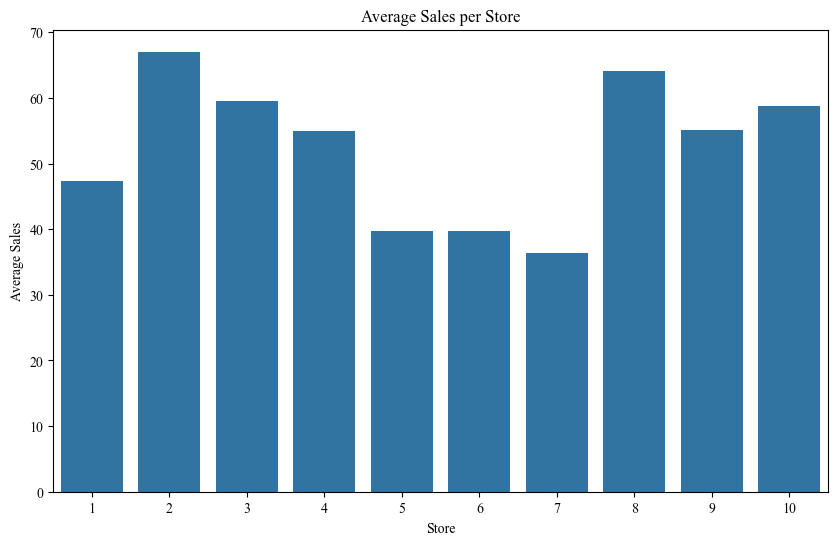

In [ ]:
store_sales = train_data.groupby(['store'])['sales'].mean()
print(store_sales)

plt.figure(figsize=(10, 6))
sns.barplot(x=store_sales.index, y=store_sales.values)
plt.title('Average Sales per Store')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.show()

item
1     21.981599
2     58.574151
3     36.642223
4     22.010241
5     18.358708
6     58.503888
7     58.531051
8     76.950055
9     51.389869
10    73.227437
11    69.656353
12    69.634940
13    84.316594
14    58.681873
15    88.030778
16    25.656079
17    32.994852
18    84.275794
19    40.355531
20    47.515936
21    40.317087
22    80.502245
23    29.297864
24    66.044633
25    80.686418
26    47.644085
27    22.049726
28    87.881325
29    69.618839
30    40.337021
31    58.644304
32    43.981763
33    69.560953
34    25.735761
35    65.801807
36    77.028916
37    29.258379
38    80.521906
39    43.883406
40    29.249398
41    22.002136
42    36.688116
43    51.294359
44    29.398193
45    80.584173
46    58.639869
47    22.003341
48    51.352848
49    29.335323
50    65.882202
Name: sales, dtype: float64


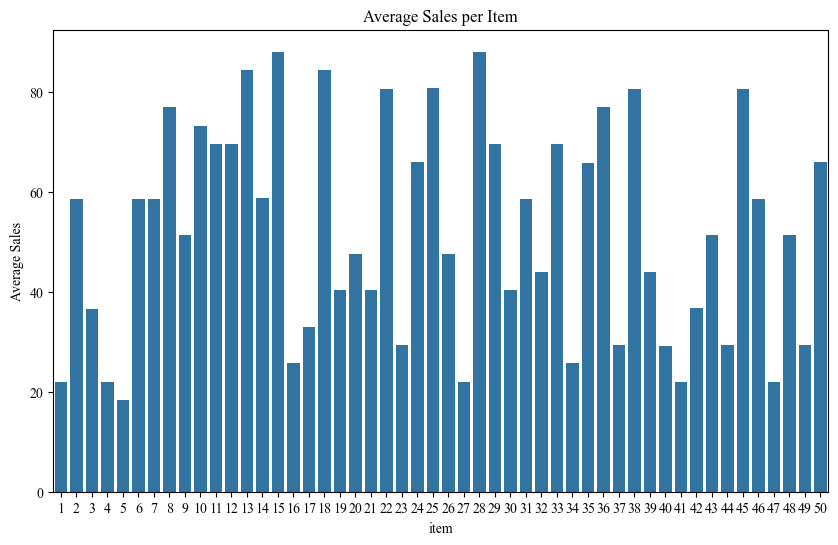

88.03077765607885


In [ ]:
item_sales = train_data.groupby(['item'])['sales'].mean()
print(item_sales)

plt.figure(figsize=(10, 6))
sns.barplot(x=item_sales.index, y=item_sales.values)
plt.title('Average Sales per Item')
plt.xlabel('item')
plt.ylabel('Average Sales')
plt.show()
print(max(item_sales))

In [ ]:
# Extract year
train_data['year'] = train_data['date'].dt.year

average_sales_table = train_data.groupby(['item', 'year'])['sales'].mean().unstack()

# Reset the index to make 'item' a column again
average_sales_table.reset_index(inplace=True)

# Rename the columns for better readability
average_sales_table.columns.name = None

# Display the resulting table
print(average_sales_table)

# Optionally, save the table to a CSV file
average_sales_table.to_csv('average_sales_table.csv', index=False)

    item       2013       2014       2015       2016       2017
0      1  18.280274  21.034795  22.056712  23.831694  24.699452
1      2  48.793425  56.112055  58.574795  63.508197  65.868767
2      3  30.523836  35.042192  36.761096  39.560383  41.315616
3      4  18.440822  21.104110  22.071233  23.831967  24.598082
4      5  15.238630  17.498356  18.326027  19.957104  20.769041
5      6  48.773151  56.087397  58.377808  63.516940  65.750411
6      7  48.876712  55.995068  58.613425  63.392623  65.764110
7      8  63.952055  73.784110  76.911233  83.260656  86.824932
8      9  42.823014  49.195616  51.626575  55.567486  57.725205
9     10  60.841370  70.114247  73.087671  79.375410  82.701644
10    11  58.076164  66.524384  69.536438  75.530874  78.597808
11    12  58.157260  66.648219  69.730137  75.312842  78.310685
12    13  70.154521  80.819452  84.266027  91.374317  94.949315
13    14  48.909863  56.068219  58.728767  63.628142  66.060822
14    15  73.295616  84.410411  88.07369

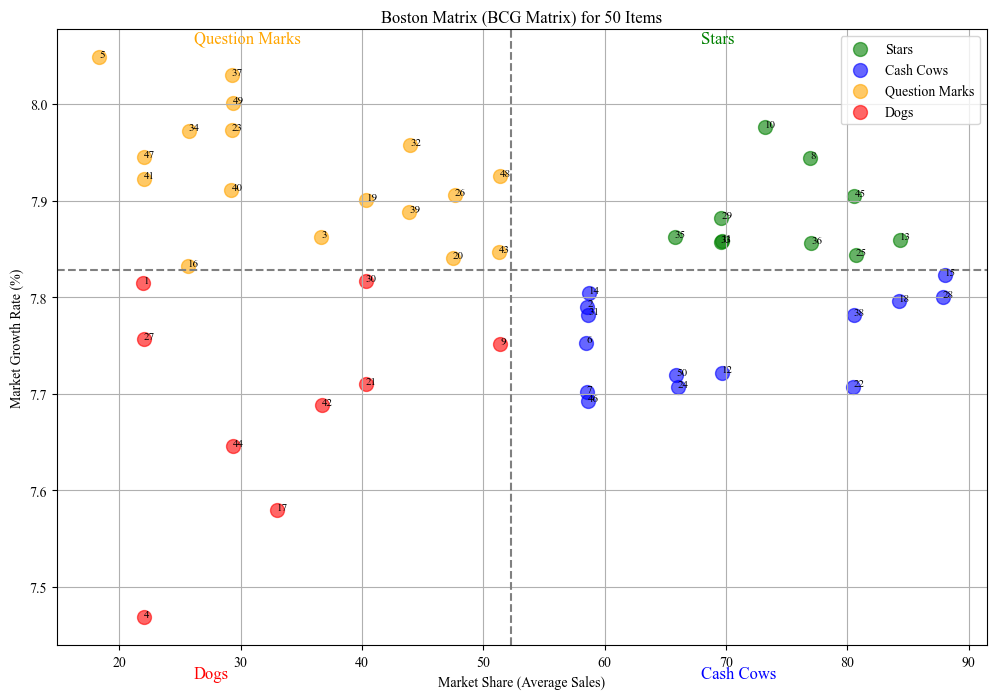

In [ ]:
average_sales_table['Market Share'] = average_sales_table.iloc[:, 1:].mean(axis=1)

# Calculate the market growth rate (CAGR) for each item
years = [int(year) for year in average_sales_table.columns[1:-1]]
average_sales_table['Market Growth'] = (
    (average_sales_table.iloc[:, -2] / average_sales_table.iloc[:, 1]) ** (1 / (years[-1] - years[0])) - 1
) * 100

avg_market_share = average_sales_table['Market Share'].mean()
avg_market_growth = average_sales_table['Market Growth'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Plot each quadrant with different colors
plt.scatter(
    average_sales_table.loc[(average_sales_table['Market Share'] >= avg_market_share) &
                            (average_sales_table['Market Growth'] >= avg_market_growth), 'Market Share'],
    average_sales_table.loc[(average_sales_table['Market Share'] >= avg_market_share) &
                            (average_sales_table['Market Growth'] >= avg_market_growth), 'Market Growth'],
    color='green', label='Stars', alpha=0.6, s=100
)

plt.scatter(
    average_sales_table.loc[(average_sales_table['Market Share'] >= avg_market_share) &
                            (average_sales_table['Market Growth'] < avg_market_growth), 'Market Share'],
    average_sales_table.loc[(average_sales_table['Market Share'] >= avg_market_share) &
                            (average_sales_table['Market Growth'] < avg_market_growth), 'Market Growth'],
    color='blue', label='Cash Cows', alpha=0.6, s=100
)

plt.scatter(
    average_sales_table.loc[(average_sales_table['Market Share'] < avg_market_share) &
                            (average_sales_table['Market Growth'] >= avg_market_growth), 'Market Share'],
    average_sales_table.loc[(average_sales_table['Market Share'] < avg_market_share) &
                            (average_sales_table['Market Growth'] >= avg_market_growth), 'Market Growth'],
    color='orange', label='Question Marks', alpha=0.6, s=100
)

plt.scatter(
    average_sales_table.loc[(average_sales_table['Market Share'] < avg_market_share) &
                            (average_sales_table['Market Growth'] < avg_market_growth), 'Market Share'],
    average_sales_table.loc[(average_sales_table['Market Share'] < avg_market_share) &
                            (average_sales_table['Market Growth'] < avg_market_growth), 'Market Growth'],
    color='red', label='Dogs', alpha=0.6, s=100
)

# Add the dividing lines
plt.axhline(y=avg_market_growth, color='gray', linestyle='--')
plt.axvline(x=avg_market_share, color='gray', linestyle='--')

# Add quadrant labels
plt.text(avg_market_share * 1.3, avg_market_growth * 1.03, 'Stars', fontsize=12, color='green')
plt.text(avg_market_share * 1.3, avg_market_growth * 0.946, 'Cash Cows', fontsize=12, color='blue')
plt.text(avg_market_share * 0.5, avg_market_growth * 1.03, 'Question Marks', fontsize=12, color='orange')
plt.text(avg_market_share * 0.5, avg_market_growth * 0.946, 'Dogs', fontsize=12, color='red')

# Add labels to the points
for i, item in enumerate(average_sales_table['item']):
    plt.annotate(item, (average_sales_table['Market Share'][i],
                        average_sales_table['Market Growth'][i]), fontsize=8)

# Add axis labels and title
plt.xlabel('Market Share (Average Sales)')
plt.ylabel('Market Growth Rate (%)')
plt.title('Boston Matrix (BCG Matrix) for 50 Items')

# Add a legend
plt.legend()

# Show grid
plt.grid()

# Display the plot
plt.show()

In [ ]:
train_data.groupby(["store", "item"]).agg({"sales": ["sum", "mean", "median", "std"]})

sales                             
               sum       mean median        std
store item                                     
1     1      36468  19.971522   19.0   6.741022
      2      97050  53.148959   52.0  15.005779
      3      60638  33.208105   33.0  10.072529
      4      36440  19.956188   20.0   6.640618
      5      30335  16.612815   16.0   5.672102
...            ...        ...    ...        ...
10    46    120601  66.046550   65.0  18.114991
      47     45204  24.755750   24.0   7.924820
      48    105570  57.814896   57.0  15.898538
      49     60317  33.032311   32.0  10.091610
      50    135192  74.037240   73.0  19.937566

[500 rows x 4 columns]

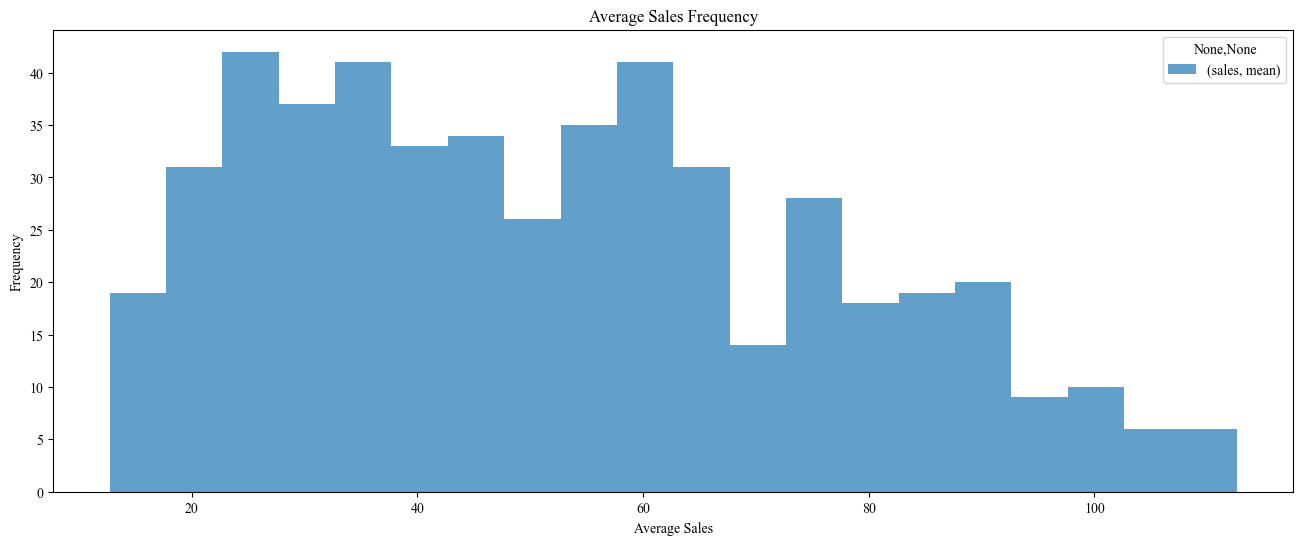

section 12.73 - 22.72 : frequency 50
section 22.72 - 32.71 : frequency 79
section 32.71 - 42.71 : frequency 74
section 42.71 - 52.70 : frequency 60
section 52.70 - 62.69 : frequency 76
section 62.69 - 72.68 : frequency 45
section 72.68 - 82.67 : frequency 46
section 82.67 - 92.66 : frequency 39
section 92.66 - 102.65 : frequency 19
section 102.65 - 112.64 : frequency 12


In [ ]:
# Average sales per stores per item distribution
train_data.groupby(["store", "item"]).agg({"sales": ["mean"]}).plot(kind='hist', alpha=0.7, bins=20, figsize=(16,6))
plt.title('Average Sales Frequency')
plt.xlabel('Average Sales')
plt.ylabel('Frequency')
plt.show()

counts, bin_edges = np.histogram(train_data.groupby(["store", "item"]).agg({"sales": ["mean"]}), bins=10)

# Section and Frequency
for i in range(len(counts)):
    print(f"section {bin_edges[i]:.2f} - {bin_edges[i+1]:.2f} : frequency {counts[i]}")

# **1.3** **DATA** **SORTING**

In [ ]:
# Convert the 'date' column to datetime objects
train_data['date'] = pd.to_datetime(train_data['date'])

# Extract year, month, and day
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day'] = train_data['date'].dt.day
train_data['month_year'] = train_data['date'].dt.to_period('M')
train_data['day_of_week'] = train_data['date'].dt.dayofweek
train_data['day_month_combination'] = train_data['day_of_week'].astype(str) + '-' + train_data['month'].astype(str)

print(train_data)


             date  store  item  sales  year  month  day month_year  day_of_week day_month_combination
0      2013-01-01      1     1     13  2013      1    1    2013-01            1                   1-1
1      2013-01-02      1     1     11  2013      1    2    2013-01            2                   2-1
2      2013-01-03      1     1     14  2013      1    3    2013-01            3                   3-1
3      2013-01-04      1     1     13  2013      1    4    2013-01            4                   4-1
4      2013-01-05      1     1     10  2013      1    5    2013-01            5                   5-1
...           ...    ...   ...    ...   ...    ...  ...        ...          ...                   ...
912995 2017-12-27     10    50     63  2017     12   27    2017-12            2                  2-12
912996 2017-12-28     10    50     59  2017     12   28    2017-12            3                  3-12
912997 2017-12-29     10    50     74  2017     12   29    2017-12            4   

In [ ]:
# Creating Cumulative Sales column
train_data['cumulative_sales'] = train_data['sales'].cumsum()
train_data['rolling_sales'] = train_data['sales'].rolling(window=7).mean()
train_data['lagged_sales'] = train_data['sales'].shift(1)
print(train_data)


             date  store  item  sales  year  month  day month_year  day_of_week day_month_combination  cumulative_sales  rolling_sales  lagged_sales
0      2013-01-01      1     1     13  2013      1    1    2013-01            1                   1-1                13            NaN           NaN
1      2013-01-02      1     1     11  2013      1    2    2013-01            2                   2-1                24            NaN          13.0
2      2013-01-03      1     1     14  2013      1    3    2013-01            3                   3-1                38            NaN          11.0
3      2013-01-04      1     1     13  2013      1    4    2013-01            4                   4-1                51            NaN          14.0
4      2013-01-05      1     1     10  2013      1    5    2013-01            5                   5-1                61            NaN          13.0
...           ...    ...   ...    ...   ...    ...  ...        ...          ...                   ...     

In [ ]:
# seperating data by stores and items
store_item_data = train_data.groupby(['store', 'item'])

# Iterate over each group (store, item)
for (store, item), data in store_item_data:
  print(f"Store: {store}, Item: {item}")
  print(data)


流式输出内容被截断，只能显示最后 5000 行内容。
299461 2017-12-29      4    17     45  2017     12   29    2017-12            4                  4-12          16189828      28.142857          26.0
299462 2017-12-30      4    17     17  2017     12   30    2017-12            5                  5-12          16189845      26.571429          45.0
299463 2017-12-31      4    17     26  2017     12   31    2017-12            6                  6-12          16189871      25.857143          17.0

[1826 rows x 13 columns]
Store: 4, Item: 18
             date  store  item  sales  year  month  day month_year  day_of_week day_month_combination  cumulative_sales  rolling_sales  lagged_sales
315898 2013-01-01      4    18     49  2013      1    1    2013-01            1                   1-1          17040209      83.428571         106.0
315899 2013-01-02      4    18     37  2013      1    2    2013-01            2                   2-1          17040246      78.000000          49.0
315900 2013-01-03      4    18    

In [ ]:
# Aggregate of sales
aggregated_data = train_data.groupby(['store', 'item'])['sales'].sum().reset_index()
print(aggregated_data)

     store  item   sales
0        1     1   36468
1        1     2   97050
2        1     3   60638
3        1     4   36440
4        1     5   30335
..     ...   ...     ...
495     10    46  120601
496     10    47   45204
497     10    48  105570
498     10    49   60317
499     10    50  135192

[500 rows x 3 columns]


In [ ]:
# sales per month_year
sales_per_month = train_data.groupby(['store', 'item','month_year'])['sales'].sum().reset_index()
print(sales_per_month)



       store  item month_year  sales
0          1     1    2013-01    328
1          1     1    2013-02    322
2          1     1    2013-03    477
3          1     1    2013-04    522
4          1     1    2013-05    531
...      ...   ...        ...    ...
29995     10    50    2017-08   2867
29996     10    50    2017-09   2586
29997     10    50    2017-10   2507
29998     10    50    2017-11   2574
29999     10    50    2017-12   1987

[30000 rows x 4 columns]


In [ ]:
# combining column 'store' and 'item' in number type

train_data['store_item'] = train_data['store'].astype(str) + train_data['item'].astype(str)
train_data['store_item'] = pd.to_numeric(train_data['store_item'])

print(train_data)

             date  store  item  sales  year  month  day month_year  day_of_week day_month_combination  cumulative_sales  rolling_sales  lagged_sales  store_item
0      2013-01-01      1     1     13  2013      1    1    2013-01            1                   1-1                13            NaN           NaN          11
1      2013-01-02      1     1     11  2013      1    2    2013-01            2                   2-1                24            NaN          13.0          11
2      2013-01-03      1     1     14  2013      1    3    2013-01            3                   3-1                38            NaN          11.0          11
3      2013-01-04      1     1     13  2013      1    4    2013-01            4                   4-1                51            NaN          14.0          11
4      2013-01-05      1     1     10  2013      1    5    2013-01            5                   5-1                61            NaN          13.0          11
...           ...    ...   ...    

In [ ]:
train_data['store_item'].nunique()

500

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   913000 non-null  datetime64[ns]
 1   store                  913000 non-null  int64         
 2   item                   913000 non-null  int64         
 3   sales                  913000 non-null  int64         
 4   year                   913000 non-null  int32         
 5   month                  913000 non-null  int32         
 6   day                    913000 non-null  int32         
 7   month_year             913000 non-null  period[M]     
 8   day_of_week            913000 non-null  int32         
 9   day_month_combination  913000 non-null  object        
 10  cumulative_sales       913000 non-null  int64         
 11  rolling_sales          912994 non-null  float64       
 12  lagged_sales           912999 non-null  floa

# **1.4 FINAL FORMAT**

In [ ]:
#Sales as per store_item and dates
sales_bydates = train_data.pivot(index='date', columns='store_item', values='sales')

sales_bydates.head(3)

print(sales_bydates)

store_item  11    12    13    14    15    16    17    18    19    21    22    23    24    25    26    27    28    29    31    32    33    34    35    36    37    38    39    41    42    43    44    45    46    47    48    49    51    52    53    54    55    56    57    58    59    61    62    63    64    65    66    67    68    69    71    72    73    74    75    76    77    78    79    81    82    83    84    85    86    87    88    89    91    92    93    94    95    96    97    98    99    \
date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               


In [ ]:
# Export .csv
train_data.to_csv('cleaned_sales_data.csv', index=False, encoding='utf-8')